# Урок 3. Видеоурок “Введение в аналитическую геометрию. Графики на плоскости”

### 1. Практическое задание по теме “Введение в аналитическую геометрию”:

In [43]:
import math
import pylab

import numpy as np
import matplotlib.pyplot as plt

from pylab import rcParams
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fsolve

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

### Задание 1.1
Даны два вектора в трехмерном пространстве: (10,10,10) и (0,0,-10)
* Найдите их сумму.
* Напишите код на Python, реализующий расчет длины вектора, заданного его координатами. (в программе)

**Решение:**

$\bar{c} = \bar{a} (10, 10, 10) - \bar{b} (0, 0, -10) = (10, 10, 0)$

In [9]:
a = np.array([10,10,10])
b = np.array([0,0,-10])

c = a + b
c

array([10, 10,  0])

In [10]:
def vector_length(value):
    return math.sqrt(value[0]**2 + value[1]**2 + value[2]**2)

In [11]:
vector_length(a)

17.320508075688775

In [12]:
vector_length(b)

10.0

In [13]:
vector_length(c)

14.142135623730951

### Задание 1.2
Почему прямые не кажутся перпендикулярными?

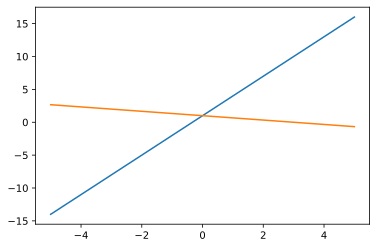

In [17]:
x = np.linspace(-5,5,21)
y = 3 * x + 1
y2 = (-1/3) * x + 1

plt.plot(x, y)
plt.plot(x, y_2)

plt.show()

__Решение:__

Отмасштабируем оси

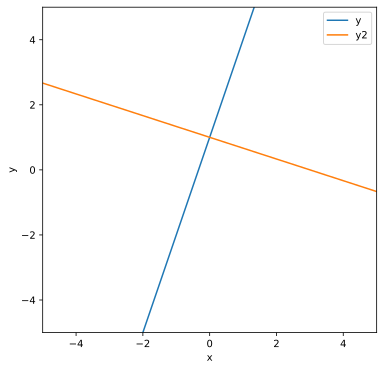

In [19]:
# Задали размер области рисования
plt.figure(figsize=(6,6))

plt.plot(x,y)
plt.plot(x,y2)

plt.xlabel("x")
plt.ylabel("y")

# Задаем масштаб осей.
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.legend(('y', 'y2'))

plt.show()

### Задание 1.3
Напишите код на Python, реализующий построение графиков:
* окружности;
* эллипса;
* гиперболы.

__Решение:__

**Окружность**

Уравнение окружности. Выразим у из уравнения окружности y = y0 + sqrt(R^2 - (x - x0)^2)

In [20]:
def circle(x, center, r, signum=1):
    # signum нужен для того, чтобы отрисовать график либо в нижней половине, 
    # либо в верхней половине относительно центра окружности.
    result = []
    for i in range(x.size):
        result.append(center[1] + (signum / math.fabs(signum)) * math.sqrt(r**2 - (x[i] - center[0])**2))
    return result

In [21]:
center = np.array([2,3])

In [22]:
r = 4

In [23]:
x = np.linspace(center[0] - r, center[0] + r, 100)

In [24]:
y1 = circle(x, center, r, 1)
y2 = circle(x, center, r, -1)

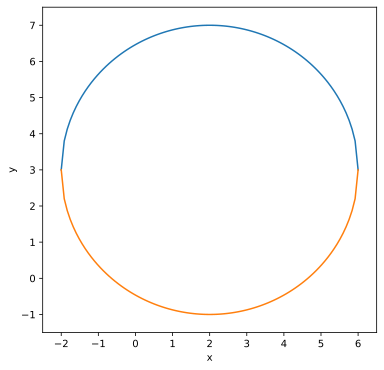

In [25]:
# Задали размер области рисования
plt.figure(figsize=(6,6))
plt.plot(x,y1)
plt.plot(x,y2)
plt.xlabel("x")
plt.ylabel("y")

# Задаем масштаб осей.
plt.xlim(-2.5, 6.5)
plt.ylim(-1.5,7.5)
plt.grid(False)

**Эллипс**

Уравнение элипса. Выразим у из уравнения элипса y = y0 + b * sqrt(1 - (x - x0)^2 / a^2)

In [26]:
def ellipse(x, a, b, center, signum=1):
    # signum нужен для того, чтобы отрисовать график либо в нижней половине, 
    # либо в верхней половине относительно центра окружности.
    result = []
    for i in range(x.size):
        result.append(center[1] + b * (signum / math.fabs(signum)) * math.sqrt(1 - ((x[i] - center[0]) / a)**2))
    return result

In [27]:
center = np.array([2,3])

In [28]:
a = 4
b = 2

In [29]:
x = np.linspace(center[0] - a, center[0] + a, 100)

In [30]:
y1 = ellipse(x, a, b, center, 1)
y2 = ellipse(x, a, b, center, -1)

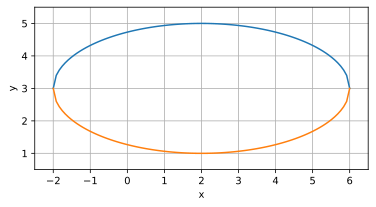

In [31]:
# Задали размер области рисования
plt.figure(figsize=(6,3))
plt.plot(x,y1)
plt.plot(x,y2)
plt.xlabel("x")
plt.ylabel("y")
# Задаем масштаб осей.
plt.xlim(-2.5, 6.5)
plt.ylim(0.5,5.5)
plt.grid(True)

**Гипербола**

Уравнение гиперболы. Выразим у из уравнения элипса y = y0 + b * sqrt(1(x - x0)^2 / a^2 - 1)

In [32]:
def hyperbole(x, a, b, center, signum=1):
    # signum нужен для того, чтобы отрисовать график либо в нижней половине, 
    # либо в верхней половине относительно центра окружности.
    result = []
    for i in range(x.size):
        if ((x[i] - center[0]) / a)**2 >= 1:
            result.append(center[1] + b * (signum / math.fabs(signum)) * math.sqrt(((x[i] - center[0]) / a)**2 - 1))
        else:
            result.append(None)
    return result

In [33]:
center = np.array([2,3])

In [34]:
a = 4
b = 2

In [35]:
x = np.linspace(center[0] - 10, center[0] + 10, 10000)

In [36]:
y1 = hyperbole(x, a, b, center, 1)
y2 = hyperbole(x, a, b, center, -1)

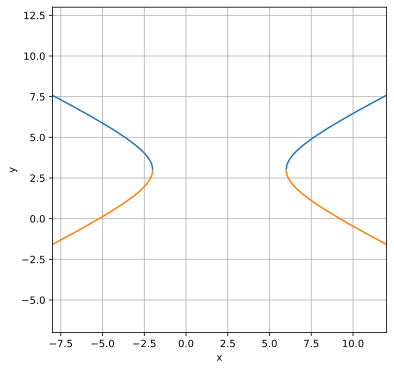

In [37]:
# Задали размер области рисования
plt.figure(figsize=(6,6))
plt.plot(x,y1)
plt.plot(x,y2)
plt.xlabel("x")
plt.ylabel("y")
# Задаем масштаб осей.
plt.xlim(center[0] - 10, center[0] + 10)
plt.ylim(center[1] - 10, center[1] + 10)
plt.grid(True)

### Задание 1.5
* Нарисуйте трехмерный график двух параллельных плоскостей.
* Нарисуйте трехмерный график двух любых поверхностей второго порядка.

Выразим z из уравнения плоскости: z = -(A x + B y + D) / C

In [38]:
x = np.arange(-5, 5, 1)
y = np.arange(-5, 5, 1)
x, y = np.meshgrid(x, y)

In [39]:
A = 6
B = 2
C = 3

D1 = -10
D2 = 10
Z1 = -(A * x + B * y + D1) / C
Z2 = -(A * x + B * y + D2) / C

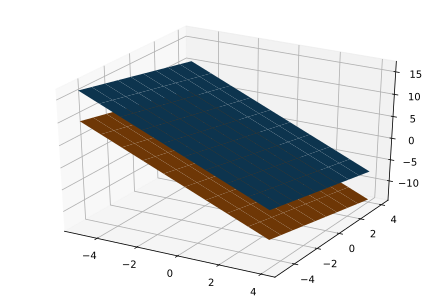

In [44]:
fig = pylab.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, Z1)
ax.plot_surface(x, y, Z2)
pylab.show()

Выразим z из уравнения элиптического параболоида: z = (x / a)^2 + (y / b)^2

Выразим z из уравнения гиперболического параболоида: z = (x / a)^2 - (y / b)^2

In [45]:
a = 0.1
b = 0.1

In [46]:
# Для наглядности поднимем кривую вверх
Z1 = (x / a)**2 + (y / b)**2 + 1200

# Для наглядности опустим кривую вниз
Z2 = (x / a)**2 - (y / b)**2 - 1200

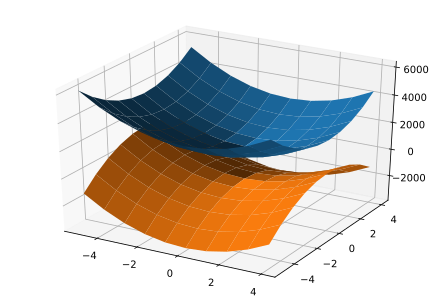

In [47]:
fig = pylab.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, Z1)
ax.plot_surface(x, y, Z2)
pylab.show()

### 2. Практическое задание по теме “Графики на плоскости”:

### Задание 2.1
Нарисуйте график функции:

y(x) = k∙cos(x – a) + b

для некоторых (2-3 различных) значений параметров k, a, b

In [48]:
def graph(x, k, a, b):
    result = []
    for i in range(x.size):
        result.append(k * math.cos(x[i] - a) + b)
    return result

In [49]:
x = np.arange(-5, 5, 0.1)
y1 = graph(x, 0.5, 2, -1)
y2 = graph(x, -0.5, -2, 1)
y3 = graph(x, 1, 3, 0)

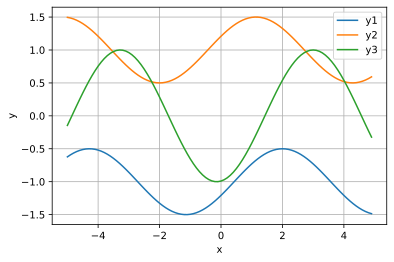

In [51]:
# Задали размер области рисования
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.xlabel("x")
plt.ylabel("y")
# Задаем масштаб осей.
# plt.xlim(center[0] - 10, center[0] + 10)
# plt.ylim(center[1] - 10, center[1] + 10)
plt.grid(True)
plt.legend(('y1', 'y2', 'y3'))

plt.show()

### Задание 2.3
* Напишите код, который будет переводить полярные координаты в декартовы.
* Напишите код, который будет рисовать график окружности в полярных координатах.
* Напишите код, который будет рисовать график отрезка прямой линии в полярных координатах.


y=R·sin(α), x=R·cos(α)

In [52]:
alpha = np.linspace(0, 2 * math.pi, 100)
R = 5
x = R * np.cos(alpha)
y = R * np.sin(alpha)

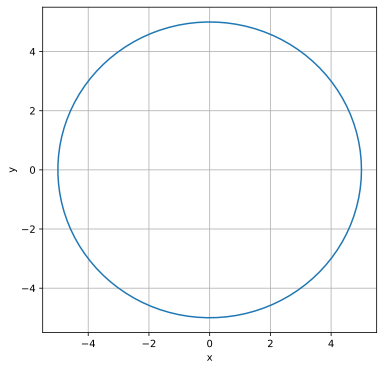

In [53]:
# Задали размер области рисования
plt.figure(figsize=(6,6))
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
# Задаем масштаб осей.
plt.xlim(-5.5, 5.5)
plt.ylim(-5.5, 5.5)
plt.grid(True)

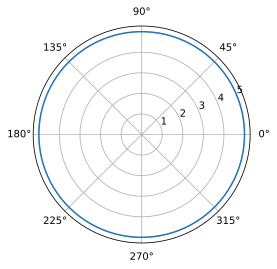

In [54]:
alpha = np.linspace(0, 2 * math.pi, 100)
R = [5 for i in range(alpha.size)]
plt.polar(alpha, R)

plt.show()

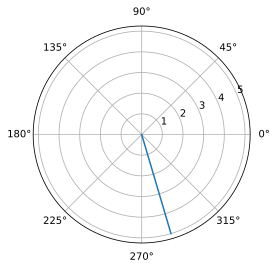

In [56]:
R = np.linspace(0, 5, 100)
alpha = [5 for i in range(R.size)]
plt.polar(alpha, R)

plt.show()

### Задание 4

Решите систему уравнений:
y = x² – 1

exp(x) + x∙(1 – y) = 1

In [57]:
x = np.linspace(-2, 3, 100)
y1 = x**2 - 1
y2 = (np.exp(x) - 1)/x + 1

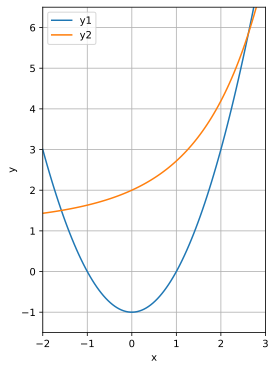

In [59]:
# Задали размер области рисования
plt.figure(figsize=(4,6))
plt.plot(x,y1)
plt.plot(x,y2)
plt.xlabel("x")
plt.ylabel("y")

# Задаем масштаб осей.
plt.xlim(-2, 3)
plt.ylim(-1.5, 6.5)
plt.grid(True)
plt.legend(('y1', 'y2'))

plt.show()

Из графика видно, что здесь два корня

Перенесем все части в одну сторону и приравняем некоторой функции

In [60]:
def systems(p):
    x, y = p
    return (x**2 - 1 - y, np.exp(x) + x - x * y - 1)

x1, y1 =  fsolve(systems, (-2, 1))
print (x1, y1)

-1.581835352893692 1.502203083670816


In [61]:
x2, y2 =  fsolve(systems, (2, 5))
print (x2, y2)

2.6181455730830665 5.854686241850252


Решите систему уравнений и неравенств:
y=x²–1

exp(x)+x∙(1–y)>1

Подставим первое уравнение во второе exp(x)+x∙(2–x²)-1>0

Определим новую функцию и найдем ее корни f=exp(x)+x∙(2–x²)-1

In [63]:
f = np.exp(x) + x * (2 - x**2) - 1

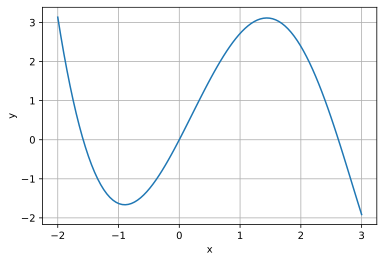

In [64]:
# Задали размер области рисования
plt.plot(x,f)
plt.xlabel("x")
plt.ylabel("y")
# Задаем масштаб осей.
plt.grid(True)


Из графика видно, что здесь три корня

In [65]:
def equation(x):
    return (np.exp(x) + x * (2 - x**2) - 1)

print(fsolve(equation, -2))

[-1.58183535]


In [66]:
print(fsolve(equation, 0))

[0.]


In [67]:
print(fsolve(equation, 2))

[2.61814557]
